In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [9]:
data_path = 'excel/extract/data_imput/data_3_firstsetp.xlsx'
save_path = './excel/extract/data_imput/data_3.xlsx'

data_origin = pd.read_excel(data_path)
print(data_origin)
data = data_origin.loc[:,'表面风化':]
data.head()

    文物采样点  表面风化  二氧化硅(SiO2)  氧化钠(Na2O)  氧化钾(K2O)  氧化钙(CaO)  氧化镁(MgO)  \
0      01     0       69.33   0.693093      9.99      6.32      0.87   
1   03部位1     0       87.05   0.000000      5.19      2.01      0.00   
2   03部位2     0       61.71   0.862734     12.37      5.87      1.11   
3      04     0       65.88   0.996509      9.67      7.12      1.56   
4      05     0       61.58   0.851628     10.95      7.35      1.77   
..    ...   ...         ...        ...       ...       ...       ...   
70     A4     0       35.47        NaN      0.79      2.89      1.05   
71     A5     1       64.29   1.200000      0.37      1.64      2.34   
72     A6     1       93.17        NaN      1.35      0.64      0.21   
73     A7     1       90.83        NaN      0.98      1.12       NaN   
74     A8     0       51.12   0.000000      0.23      0.89      0.00   

    氧化铝(Al2O3)  氧化铁(Fe2O3)  氧化铜(CuO)   氧化铅(PbO)   氧化钡(BaO)  五氧化二磷(P2O5)  \
0         3.93        1.74      3.87   0.325067   0.829530  

,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,0,69.33,0.693093,9.99,6.32,0.87,3.93,1.74,3.87,0.325067,0.829530,1.17,0.018753,0.133558,0.390000
1,0,87.05,0.000000,5.19,2.01,0.00,4.06,0.00,0.78,0.250000,0.000000,0.66,0.000000,0.000000,0.000000
2,0,61.71,0.862734,12.37,5.87,1.11,5.50,2.16,5.09,1.410000,2.860000,0.70,0.100000,0.161183,0.096083
3,0,65.88,0.996509,9.67,7.12,1.56,6.44,2.06,2.18,0.198087,0.393507,0.79,0.021824,0.390073,0.360000
4,0,61.58,0.851628,10.95,7.35,1.77,7.50,2.62,3.27,0.213704,0.593154,0.94,0.060000,0.341514,0.470000


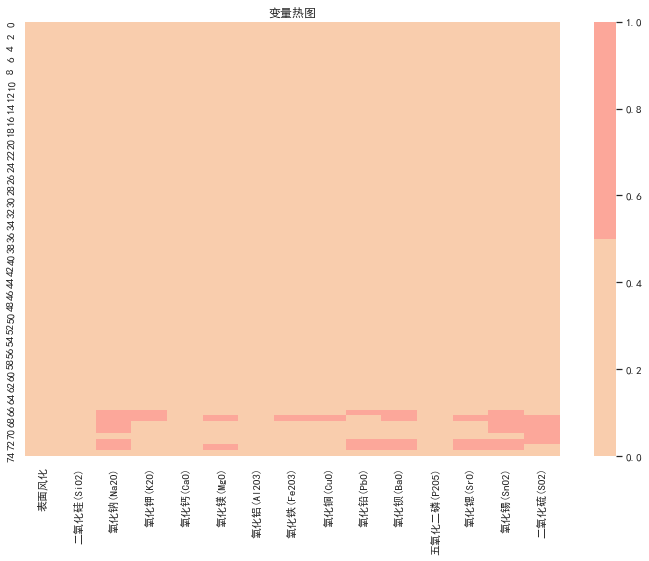

In [10]:
### 绘制缺失变量的热图
def miss_heatamp(data,title):
    cols = data.columns
    colours = ['#f9cdad', '#fca79a']  ## 第一项没缺失的颜色，第二项，缺失的颜色

    plt.figure(figsize=(12,8 ))
    # plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
    # plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题
    sns.set(font='SimHei', font_scale=1)
    f = sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))
    f.set_title(title)
    plt.savefig('1.png')

miss_heatamp(data,'变量热图')

            miss_num
氧化钠(Na2O)          6
氧化钾(K2O)           2
氧化镁(MgO)           2
氧化铁(Fe2O3)         1
氧化铜(CuO)           1
氧化铅(PbO)           3
氧化钡(BaO)           4
氧化锶(SrO)           3
氧化锡(SnO2)          6
二氧化硫(SO2)          5


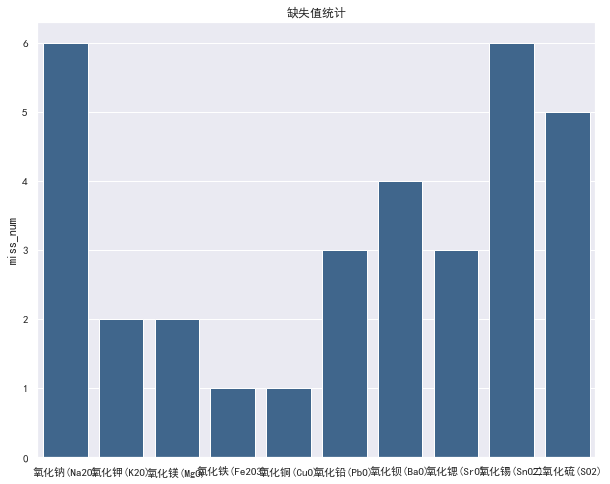

In [11]:
##### 绘制缺失变量的直方图
def miss_bar(data,title):
    '''
    data : dataframe格式的数据，行为数据，列为特征 
    title : 图表名字
    '''
    missValue2miss_num={}
    for col in data.columns:
        missing = data[col].isnull()
        num_missing = np.sum(missing)
        if num_missing > 0:  
            missValue2miss_num[col] = num_missing
    df = pd.DataFrame([missValue2miss_num])
    df.index=['miss_num']
    df = df.T
    print(df)
    
    plt.figure(figsize=(10,8 ))
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
    plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题
    sns.set(font='SimHei', font_scale=1)

    f = sns.barplot(x=df.index,y=df['miss_num'],color='#336699')
    f.set_title(title)

miss_bar(data,'缺失值统计')

In [12]:

def rf_impute(data):
    '''
    data:dataframe格式
    '''

    copy_data = data.copy()
    miss_columns = copy_data.isnull().sum()[copy_data.isnull().sum() != 0].sort_values().index.tolist() 
    unmiss_columns = copy_data.isnull().sum()[copy_data.isnull().sum() == 0].sort_values().index.tolist() 
    for col in miss_columns:
        X_train = copy_data[copy_data[col].notnull()][unmiss_columns].values
        Y_train = copy_data[copy_data[col].notnull()][col].values
        X_test = copy_data[copy_data[col].isnull()][unmiss_columns][unmiss_columns].values
        rfr=RandomForestRegressor()
        rfr.fit(X_train,Y_train)
        predict_value = rfr.predict(X_test)
        copy_data.loc[(copy_data[col].isnull()),col] = predict_value
        unmiss_columns.append(col)
    return copy_data

imp_data = rf_impute(data)
imp_data.to_excel(save_path)
imp_data

,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,0,69.33,0.693093,9.99,6.32,0.870000,3.93,1.74,3.87,0.325067,0.829530,1.17,0.018753,0.133558,0.390000
1,0,87.05,0.000000,5.19,2.01,0.000000,4.06,0.00,0.78,0.250000,0.000000,0.66,0.000000,0.000000,0.000000
2,0,61.71,0.862734,12.37,5.87,1.110000,5.50,2.16,5.09,1.410000,2.860000,0.70,0.100000,0.161183,0.096083
3,0,65.88,0.996509,9.67,7.12,1.560000,6.44,2.06,2.18,0.198087,0.393507,0.79,0.021824,0.390073,0.360000
4,0,61.58,0.851628,10.95,7.35,1.770000,7.50,2.62,3.27,0.213704,0.593154,0.94,0.060000,0.341514,0.470000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0,35.47,1.812859,0.79,2.89,1.050000,7.07,6.45,0.96,24.280000,8.310000,8.45,0.280000,0.208724,0.846511
71,1,64.29,1.200000,0.37,1.64,2.340000,12.75,0.81,0.94,12.230000,2.160000,0.19,0.210000,0.490000,0.214588
72,1,93.17,0.243832,1.35,0.64,0.210000,1.52,0.27,1.73,0.355959,0.187792,0.21,0.005118,0.062371,0.126802
73,1,90.83,0.604180,0.98,1.12,0.819597,5.06,0.24,1.17,0.387595,0.378722,0.13,0.006929,0.148625,0.110000


In [24]:
data = pd.read_excel('excel\extract\data_imput\data_3_second.xlsx')
data.head()

,文物采样点,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),...,氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),sum,diff,after,origin,target
0,A1,0,0,0.780212,8.264442,0,0.000000,0,0.000000,0.000000,...,0.730175,0,0.000000,0.313144,0.000000,10.497033,0.52,109.977033,99.48,100
1,A2,1,0,0.605972,5.042012,0,0.871746,0,3.382983,2.860732,...,5.446304,0,0.361814,0.162415,0.812732,19.546711,3.72,115.826711,96.28,100
2,A3,0,0,0.529968,0.000000,0,0.000000,0,0.000000,0.000000,...,0.000000,0,0.000000,0.302151,0.614843,1.446962,1.02,100.426962,98.98,100
3,A4,0,0,1.812859,0.000000,0,0.000000,0,0.000000,0.000000,...,0.000000,0,0.000000,0.208724,0.846511,2.868094,4.00,98.868094,96.00,100
4,A5,1,0,0.000000,0.000000,0,0.000000,0,0.000000,0.000000,...,0.000000,0,0.000000,0.000000,0.214588,0.214588,0.38,99.834588,99.62,100


In [25]:
for i in range(data.shape[0]):
    # for j in data.loc[i, '二氧化硅(SiO2)':'二氧化硫(SO2)']:
    for j in range(2,16):
        if data.loc[i,'diff']>2:
            data.loc[i,'diff']=2
        data.iloc[i, j] = data.iloc[i, j] / data.loc[i,'sum']*data.loc[i,'diff']

data.to_excel('excel/extract/data_imput/data_3_thrid.xlsx')
data

c:\Miniconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
c:\Miniconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


,文物采样点,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),...,氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),sum,diff,after,origin,target
0,A1,0,0.0,0.038650,0.409402,0.0,0.000000,0.0,0.000000,0.000000,...,0.036171,0.0,0.000000,0.015512,0.000000,10.497033,0.52,109.977033,99.48,100
1,A2,1,0.0,0.062002,0.515894,0.0,0.089196,0.0,0.346143,0.292707,...,0.557260,0.0,0.037020,0.016618,0.083158,19.546711,2.00,115.826711,96.28,100
2,A3,0,0.0,0.373588,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.212994,0.433418,1.446962,1.02,100.426962,98.98,100
3,A4,0,0.0,1.264156,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.145549,0.590295,2.868094,2.00,98.868094,96.00,100
4,A5,1,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.380000,0.214588,0.38,99.834588,99.62,100
5,A6,1,0.0,0.223500,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.172133,0.0,0.004691,0.057170,0.116229,0.981874,0.90,100.081874,99.10,100
6,A7,1,0.0,0.092727,0.000000,0.0,0.125788,0.0,0.000000,0.000000,...,0.058125,0.0,0.001063,0.022810,0.000000,2.345648,0.36,101.985648,99.64,100
7,A8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.02,99.980000,99.98,100
